<a href="https://colab.research.google.com/github/erankfmn/anomaly_detection/blob/main/gas%3B_ARIMA%2BSARIMA%2BSTL_%2B_Group_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import sys
import itertools
from numpy import mean, sqrt, square, arange
from numpy import array
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from IPython.display import display, clear_output
from sklearn import metrics
import warnings

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
dataset = pd.read_json('/content/gdrive/MyDrive/dataset1.txt')

cdf=dataset.loc[dataset['isError']==0]
df={'index':cdf.index,'DnT':cdf['timeStamp'],'value':cdf['gas'],'gas':cdf['gas'],'gasPrice':cdf['gasPrice']}
df=pd.DataFrame(df)
df.to_csv('/content/gdrive/MyDrive/newDataRun/newData.csv')
Data_Set=pd.read_csv('/content/gdrive/MyDrive/newDataRun/newData.csv')

Mounted at /content/gdrive


## ARIMA

In [ ]:
sens=3

In [ ]:
df=Data_Set
df = df[['index','DnT', 'value']]
df.insert(3,"anomaly",2)


train_set, test_set = df.loc[df['DnT'] <= '2017-08-13 00:00:00'], df.loc[df['DnT'] > '2017-08-13 00:00:00']

train=np.array(train_set['value'])
test=np.array(test_set['value'])

vector = np.vectorize(np.float)
test = vector(test)
train = vector(train)

p = range(0,2)
d = range(0,2)
q = range(0,1)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None
temp_model = None
for param in pdq:   
    temp_model = ARIMA(train,order=param)
    results = temp_model.fit()
    if results.aic < best_aic:
        best_aic = results.aic
        best_pdq = param 

# using the best parameter in the model
model = ARIMA(train,order=(best_pdq))
model_fit = model.fit()
predictions = model_fit.predict(start=0,end=len(test_set)-1)

test_set.insert(4,"prediction",predictions)
test_set.insert(5,"error",abs(predictions-test))
train_set.insert(4,"prediction",None)
train_set.insert(5,"error",None)

rms=np.sqrt(metrics.mean_squared_error(y_true = test, y_pred = predictions))

import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
test_set['anomaly'] = test_set['error'] > sens*rms
anomalies = test_set.loc[test_set['anomaly'] == True]

new=pd.concat([train_set, test_set], axis=0)
#new.to_csv('/content/gdrive/MyDrive/newDataRun/FinalDatasetForARIMA.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
ARIMA_df=new
anomaly_ARIMA=anomalies
ARIMA_df

,index,DnT,value,anomaly,prediction,error
0,0,2017-08-04 14:39:20,21000,2,None,None
1,1,2017-08-04 15:32:36,21001,2,None,None
2,2,2017-08-04 15:51:15,21001,2,None,None
3,3,2017-08-04 15:51:15,21001,2,None,None
4,4,2017-08-04 16:20:20,37515,2,None,None
...,...,...,...,...,...,...
9965,9995,2017-08-16 10:18:32,21001,0,30863.5,9862.5
9966,9996,2017-08-16 10:18:32,21001,0,30863.5,9862.5
9967,9997,2017-08-16 10:18:32,21001,0,30863.5,9862.5
9968,9998,2017-08-16 10:18:32,21001,0,30863.5,9862.5


## ARIMA plot


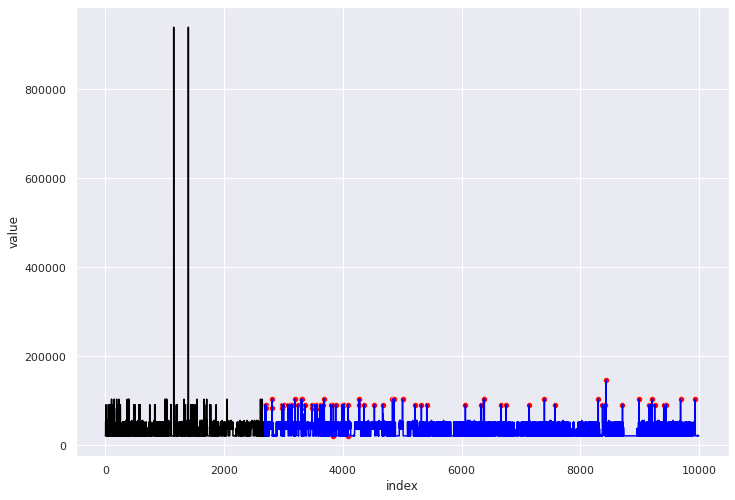

In [ ]:
sns.lineplot(x=train_set['index'], y=train_set['value'],color='black')
sns.lineplot(x=test_set['index'], y=test_set['value'],color='blue')
sns.scatterplot(x=anomalies['index'], y=anomalies['value'], color='red')

## SARIMA

In [ ]:
df=Data_Set
df.insert(3,"anomaly",4)

In [ ]:
train_set, test_set = df.loc[df['DnT'] <= '2017-08-13 00:00:00'], df.loc[df['DnT'] > '2017-08-13 00:00:00']

In [ ]:

train=np.array(train_set['value'])
test=np.array(test_set['value'])

vector = np.vectorize(np.float)
test = vector(test)
train = vector(train)

p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
#best_pdq = None
#best_seasonal_pdq = None
# temp_model = None
for param in pdq:   
    for param_seasonal in seasonal_pdq: 
        temp_model = SARIMAX(train,order=param)#,seasonal_order = param_seasonal,enforce_invertibility=False,enforce_stationarity=False)
        results = temp_model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal

# using the best parameter in the model
model = SARIMAX(train,order=(best_pdq),seasonal_order=(best_seasonal_pdq),enforce_invertibility=False,enforce_stationarity=False)
model_fit = model.fit()
predictions = model_fit.predict(start=0,end=len(test_set)-1)#,dynamic=True)
test_set.insert(4,"prediction",predictions)
test_set.insert(5,"error",abs(predictions-test))
train_set.insert(4,"prediction",None)
train_set.insert(5,"error",None)

rms=np.sqrt(metrics.mean_squared_error(y_true = test, y_pred = predictions))

import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
test_set['anomaly'] = test_set['error'] > sens*rms
anomalies = test_set.loc[test_set['anomaly'] == True]

new=pd.concat([train_set, test_set], axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
SARIMA_df=new
anomaly_SARIMA=anomalies

## SARIMA plot

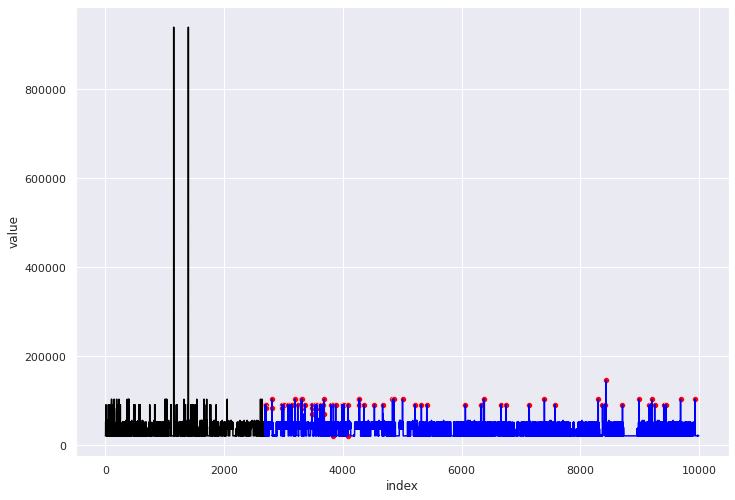

In [ ]:

sns.lineplot(x=train_set['index'], y=train_set['value'],color='black')
sns.lineplot(x=test_set['index'], y=test_set['value'],color='blue')
sns.scatterplot(x=anomalies['index'], y=anomalies['value'], color='red')


## STL

In [ ]:
import csv
import pandas as pd
import numpy as np
from numpy import array
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm
from IPython.display import display, clear_output
from numpy import mean, sqrt, square, arange
import warnings
from datetime import datetime

df=Data_Set
df.insert(3,"rms",2)
df.insert(4,"resid",2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:

value = array(df['value'])
value=value.tolist()
Value = pd.Series(value, index=df['DnT'])
Value.describe()

decomposition = sm.tsa.seasonal_decompose(x=Value, freq=10, two_sided=True, extrapolate_trend=2)
rms = sqrt(mean(square(decomposition.resid)))
error=array(decomposition.resid)

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
df['anomaly'] = error > sens*rms

anomalies = df.loc[df['anomaly'] == True]
STL_df=df
anomaly_STL=df.loc[df['anomaly']==True]
#df.to_csv('/content/gdrive/MyDrive/newDataRun/FinalDatasetForSTL.csv')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

fig = make_subplots(4, 1)

####### Values
fig.add_trace(go.Scatter(
    x=list(Data_Set['DnT']),
    y=list(Data_Set['value']),
    name="Values",
    text=list(Data_Set['value']),
    yaxis="y",
    mode="lines",
    showlegend=True,
    marker = dict(color = 'blue')
), 1, 1)

####### STL
fig.add_trace(go.Scatter(
    x=list(Data_Set['DnT']),
    y=list(decomposition.seasonal),
    name="seasonal",
    text=list(Data_Set['value']),
    yaxis="y4",
    mode="lines",
    showlegend=True,
    marker = dict(color = 'orange')
), 2, 1)

####### ARIMA
fig.add_trace(go.Scatter(
    x=list(Data_Set['DnT']),
    y=list(decomposition.trend),
    name="trend",
    text=list(Data_Set['value']),
    yaxis="y2",
    mode="lines",
    showlegend=True,
    marker = dict(color = 'green')
), 3, 1)

####### SARIMA
fig.add_trace(go.Scatter(
    x=list(Data_Set['DnT']),
    y=list(decomposition.resid),
    name="resid",
    text=list(Data_Set['value']),
    mode="lines",
    yaxis="y3",
    showlegend=True,
    marker = dict(color = 'purple')
), 4, 1)

# style all the traces
fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 2},
    marker={"size": 4},
)


# Update axes
fig.layout.update(
    xaxis=dict(
        autorange=True,
        range=[Data_Set['index'][0], Data_Set['index'][len(Data_Set['index'])-1]],
        rangeslider=dict(autorange=True,range=[Data_Set['index'][0], Data_Set['index'][len(Data_Set['index'])-1]]),
        rangeselector=dict(
            buttons=list([ dict(count=1, label='1d', step='day', stepmode='backward'),
                           dict(count=7, label='7d', step='day', stepmode='backward'),
                        dict(step='all')
                        ])
        ),
        type='-'
    ),
    yaxis=dict(
        domain=[0, 0.2],
        title="Resid"
    ),
    yaxis2=dict(
        domain=[0.25, 0.45],
        title="Trend"
    ),
    yaxis3=dict(
        domain=[0.5, 0.7],
        title="Seasonal"
    ),
    yaxis4=dict(
        domain=[0.75, 0.95],
        title="Value"
    ),
)


fig.update_xaxes(matches='x')
fig.layout.update(autosize=False, width=950, height=900)
fig.layout.update(
    title='STL GAS PLOT',
    xaxis=dict(
        rangeselector=dict(
            x=0.1,
            xanchor="left",
            y=0.8,
            yanchor="top"
            
        )
    )
)
fig.show()

## STL plot

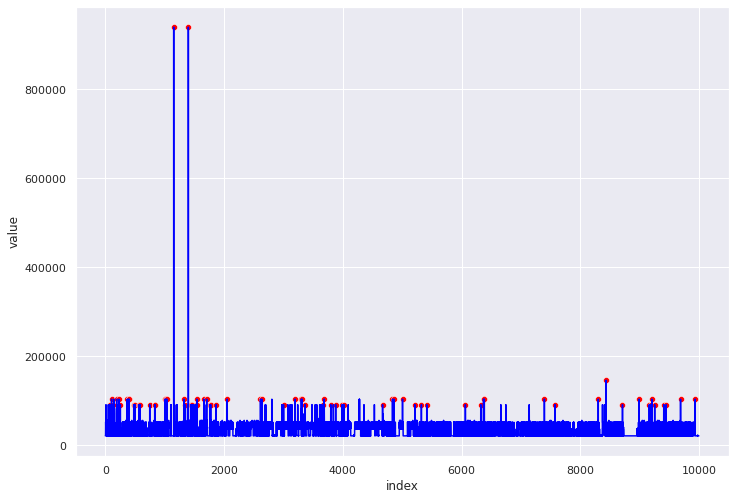

In [ ]:


sns.lineplot(x=df['index'], y=df['value'],color='blue')
sns.scatterplot(x=anomalies['index'], y=anomalies['value'], color='red')


## Group A Calculation

In [ ]:
allData=df.drop(columns=['rms','resid'])
allData

,Unnamed: 0,index,DnT,anomaly,value,gas,gasPrice
0,0,0,2017-08-04 14:39:20,False,21000,21000,20000000000
1,1,1,2017-08-04 15:32:36,False,21001,21001,20000000000
2,2,2,2017-08-04 15:51:15,False,21001,21001,4000000001
3,3,3,2017-08-04 15:51:15,False,21001,21001,4000000001
4,4,4,2017-08-04 16:20:20,False,37515,37515,4000000001
...,...,...,...,...,...,...,...
9965,9995,9995,2017-08-16 10:18:32,False,21001,21001,21000000000
9966,9996,9996,2017-08-16 10:18:32,False,21001,21001,21000000000
9967,9997,9997,2017-08-16 10:18:32,False,21001,21001,21000000000
9968,9998,9998,2017-08-16 10:18:32,False,21001,21001,21000000000


In [ ]:
x=array(ARIMA_df['anomaly'])
y=array(SARIMA_df['anomaly'])
w=array(STL_df['anomaly'])

z=np.zeros(len(allData),dtype=bool)

for i in range(0, len(allData)):
  if (x[i]==1 and y[i]==1): 
    z[i]=True
  else: 
    if (x[i]==1 and w[i]==1): 
       z[i]=True
    else: 
      if (y[i]==1 and w[i]==1): 
         z[i]=True
      else: 
        z[i]=False
allData['anomaly']=z

In [ ]:
Total_anomaly=allData.loc[z==True]


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
#from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)
sdf=pd.read_csv('/content/gdrive/MyDrive/newDataRun/GroupA.csv')

#y=sdf.value
fig = make_subplots(4, 1)

####### Values
fig.add_trace(go.Scatter(
    x=list(allData['DnT']),
    y=list(allData['value']),
    name="Values",
    text=list(allData['value']),
    yaxis="y",
    mode="lines",
    showlegend=True,
    marker = dict(color = 'blue')
), 1, 1)

fig.add_trace(go.Scatter(
    x=list(Total_anomaly['DnT']),
    y=list(Total_anomaly['value']),
    name="Values",
    yaxis="y",
    mode="markers",
    text=list(Total_anomaly['value']),
    showlegend=False,
    marker = dict(color = 'red')
), 1, 1)

####### STL
fig.add_trace(go.Scatter(
    x=list(allData['DnT']),
    y=list(allData['value']),
    name="STL",
    text=list(allData['value']),
    yaxis="y4",
    mode="lines",
    showlegend=True,
    marker = dict(color = 'orange')
), 2, 1)

fig.add_trace(go.Scatter(
    x=list(anomaly_STL['DnT']),
    y=list(anomaly_STL['value']),
    name="STL",
    yaxis="y4",
    mode="markers",
    text=list(anomaly_STL['value']),
    showlegend=False,
    marker = dict(color = 'red')
), 2, 1)

####### ARIMA
fig.add_trace(go.Scatter(
    x=list(allData['DnT']),
    y=list(allData['value']),
    name="ARIMA",
    text=list(allData['value']),
    yaxis="y2",
    mode="lines",
    showlegend=True,
    marker = dict(color = 'green')
), 3, 1)

fig.add_trace(go.Scatter(
    x=list(anomaly_ARIMA['DnT']),
    y=list(anomaly_ARIMA['value']),
    name="ARIMA",
    text=list(anomaly_ARIMA['value']),
    yaxis="y2",
    mode="markers",
    showlegend=False,
    marker = dict(color = 'red')
), 3, 1)


####### SARIMA
fig.add_trace(go.Scatter(
    x=list(allData['DnT']),
    y=list(allData['value']),
    name="SARIMA",
    text=list(allData['value']),
    mode="lines",
    yaxis="y3",
    showlegend=True,
    marker = dict(color = 'purple')
), 4, 1)

fig.add_trace(go.Scatter(
    x=list(anomaly_SARIMA['DnT']),
    y=list(anomaly_SARIMA['value']),
    name="SARIMA",
    text=list(anomaly_SARIMA['value']),
    yaxis="y3",
    mode="markers",
    showlegend=False,
    marker = dict(color = 'red')
), 4, 1)

# style all the traces
fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 2},
    marker={"size": 4},
)


# Update axes
fig.layout.update(
    xaxis=dict(
        autorange=True,
        range=[sdf.index[0], sdf.index[len(sdf.index)-1]],
        rangeslider=dict(autorange=True,range=[sdf.index[0], sdf.index[len(sdf.index)-1]]),
        rangeselector=dict(
            buttons=list([ dict(count=1, label='1d', step='day', stepmode='backward'),
                           dict(count=7, label='7d', step='day', stepmode='backward'),
                        dict(step='all')
                        ])
        ),
        type='-'
    ),
    yaxis=dict(
        domain=[0, 0.2],
        title="Values"
    ),
    yaxis2=dict(
        domain=[0.25, 0.45],
        title="STL"
    ),
    yaxis3=dict(
        domain=[0.5, 0.7],
        title="ARIMA"
    ),
    yaxis4=dict(
        domain=[0.75, 0.95],
        title="SARIMA"
    ),
)


fig.update_xaxes(matches='x')
fig.layout.update(autosize=False, width=950, height=900)
fig.layout.update(
    title='Group B Calculations',
    xaxis=dict(
        rangeselector=dict(
            x=0.1,
            xanchor="left",
            y=0.8,
            yanchor="top"
            
        )
    )
)


Mounted at /content/gdrive


Layout({
    'autosize': False,
    'height': 900,
    'template': '...',
    'title': {'text': 'Group B Calculations'},
    'width': 950,
    'xaxis': {'anchor': 'y',
              'autorange': True,
              'domain': [0.0, 1.0],
              'matches': 'x',
              'range': [0, 5611],
              'rangeselector': {'buttons': [{'count': 1, 'label': '1d', 'step': 'day', 'stepmode': 'backward'},
                                            {'count': 7, 'label': '7d', 'step': 'day', 'stepmode': 'backward'},
                                            {'step': 'all'}],
                                'x': 0.1,
                                'xanchor': 'left',
                                'y': 0.8,
                                'yanchor': 'top'},
              'rangeslider': {'autorange': True, 'range': [0, 5611]},
              'type': '-'},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0], 'matches': 'x'},
    'xaxis3': {'anchor': 'y3', 'domain': [0.0, 1.0], 'match

## Plot

In [ ]:

fig.show()

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==True and y_pred[i]==1:
           TP=TP+ 1
        if y_pred[i]==1 and y_actual[i]==False:
           FP += 1
        if y_actual[i]==False and y_pred[i]==0:
           TN += 1
        if y_pred[i]==False and y_actual[i]==True:
           FN += 1
    return(TP, FP, TN, FN)


In [ ]:

ARIMA_measure=perf_measure(array(allData['anomaly']),
                           array(ARIMA_df['anomaly']))
SARIMA_measure=perf_measure(array(allData['anomaly']),
                           array(SARIMA_df['anomaly']))
STL_measure=perf_measure(array(allData['anomaly']),
                           array(STL_df['anomaly']))
from tabulate import tabulate

d = [ 
     ["Positive", ARIMA_measure[0], ARIMA_measure[1]],
     ["Negative",ARIMA_measure[2], ARIMA_measure[3]],
     ]

print(tabulate(d, headers=["ARIMA", "True", "False"])) 
print("")
print( 'Sensitivity:'+ str((ARIMA_measure[0])/(ARIMA_measure[0]+ARIMA_measure[3]))) 
print( 'Specificity:'+ str((ARIMA_measure[0])/(ARIMA_measure[0]+ARIMA_measure[1]) ))
print( 'Accurany:'+ str((ARIMA_measure[0]+ARIMA_measure[2])/(ARIMA_measure[0]+ARIMA_measure[1]+ARIMA_measure[2]+ARIMA_measure[3]) ))

print("")
print("")
d = [ 
     ["Positive", SARIMA_measure[0], SARIMA_measure[1]],
     ["Negative",SARIMA_measure[2], SARIMA_measure[3]],
     ]

print(tabulate(d, headers=["SARIMA", "True", "False"])) 
print("")
print( 'Sensitivity:'+ str((SARIMA_measure[0])/(SARIMA_measure[0]+SARIMA_measure[3]))) 
print( 'Specificity:'+ str((SARIMA_measure[0])/(SARIMA_measure[0]+SARIMA_measure[1]) ))
print( 'Accurany:'+ str((SARIMA_measure[0]+SARIMA_measure[2])/(SARIMA_measure[0]+SARIMA_measure[1]+SARIMA_measure[2]+SARIMA_measure[3]) ))

print("")
print("")
d = [ 
     ["Positive", SARIMA_measure[0], SARIMA_measure[1]],
     ["Negative",SARIMA_measure[2], SARIMA_measure[3]],
     ]

print(tabulate(d, headers=["STL", "True", "False"])) 
print("")
print( 'Sensitivity:'+ str((STL_measure[0])/(STL_measure[0]+STL_measure[3]))) 
print( 'Specificity:'+ str((STL_measure[0])/(STL_measure[0]+STL_measure[1]) ))
print( 'Accurany:'+ str((STL_measure[0]+STL_measure[2])/(STL_measure[0]+STL_measure[1]+STL_measure[2]+STL_measure[3]) ))

ARIMA       True    False
--------  ------  -------
Positive      73        0
Negative    7228        0

Sensitivity:1.0
Specificity:1.0
Accurany:1.0


SARIMA      True    False
--------  ------  -------
Positive      73        2
Negative    7226        0

Sensitivity:1.0
Specificity:0.9733333333333334
Accurany:0.9997260649226133


STL         True    False
--------  ------  -------
Positive      73        2
Negative    7226        0

Sensitivity:0.4931506849315068
Specificity:0.5
Accurany:0.9926780341023069
